# Examples of speech segments labeled with neutral and non-neutral emotion classes.



# Download Dataset

* https://drive.google.com/drive/folders/12Nuv8J7pBHJuNU3nH2c7F8VwCDEE6GDt

In [ ]:
!gdown --id 1N56YOgJ_plF4K8Eyh9hqiP0_O5L8uwya

In [ ]:
!unzip data_train.zip

In [ ]:
from os import listdir
from os.path import isfile, join
import pandas as pd

train_data_dir = 'train'

train_audio_files = [f for f in listdir(train_data_dir) if isfile(join(train_data_dir, f))]

L = []
for f in train_audio_files:
  v = f.replace('.wav','').split('_')
  L.append([f,v[len(v)-1]])

df_train = pd.DataFrame(L)

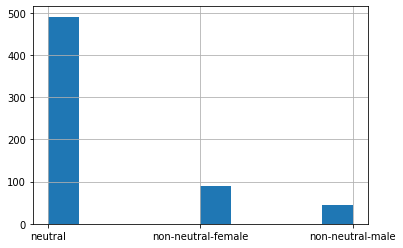

In [ ]:
df_train[1].hist()

# Code for reading and playing the audio.

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
from scipy.io import wavfile

def playaudio(wav_file):
  data = wavfile.read(wav_file)
  framerate = data[0]
  sounddata = data[1]
  time      = np.arange(0,len(sounddata))/framerate
  y, sr = librosa.load(wav_file)


  plt.plot(y)
  plt.xlabel('Time (samples)')
  plt.ylabel('Amplitude')
  plt.show()

  spec = np.abs(librosa.stft(y, hop_length=512))
  spec = librosa.amplitude_to_db(spec, ref=np.max)
  librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log')
  plt.colorbar(format='%+2.0f dB')
  plt.title('Spectrogram')
  plt.show()

  return Audio(sounddata,rate=framerate)

# Example of a Speech Segment with Emotion Labeled as Neutral

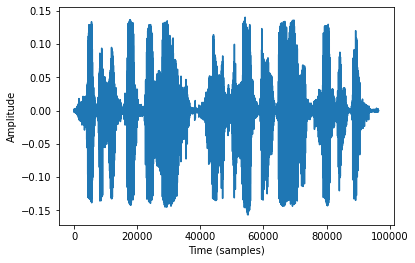

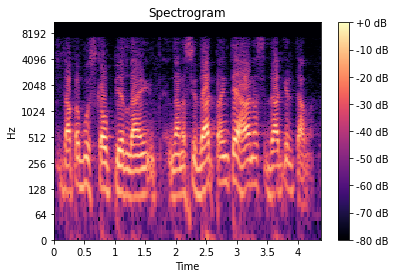

In [ ]:
playaudio('train/bfammn03_segment91_neutral.wav')

# Example of a Speech Segment with Emotion Labeled as Non-Neutral (Male)

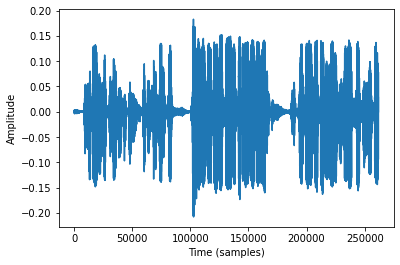

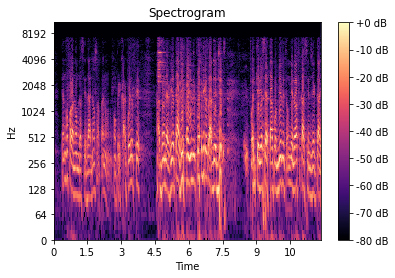

In [ ]:
playaudio('train/bfammn03_segment92_non-neutral-male.wav')